# Example usage for least absolute error regression.

This notebook illustrates the usage for the `lae_regression.l1_fit` function
which implements least absolute error linear regression using linear programming.

In [1]:
%matplotlib inline
%precision 3
from lae_regression import l1_fit
from lae_regression.plot_helper import plot
import numpy as np  # for convenience

## Trivial example usage

The most trivial example of regression has one dependent variable $x$ and
one independent variable $y$ and there are two samples

Here we "regress" two points mapping
```
1 --> 0
2 --> 1
```
and we expect to get the fitted formula

$$ y = m * x + k $$

where $ m = 1 $ and $ k = -1 $.

In [2]:
# Trivial example usage
# Independent variable values.
U = ([1], [2])
# Dependent variable values
v = (0, 1)
# Perform the regression.
result = l1_fit(U, v)
result["m"], result["k"], result["residuals"], result["samples"], result["dimensions"]

(array([ 1.]), -1.000, array([ 0.,  0.]), 2, 1)

Above note that the independent values is a sequence of lists because in general
there may be more than one independent value.

For one dimensional examples we have a helper which will show how the fit
compares to a scatter plot of the input mappings.

//anaconda/lib/python2.7/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


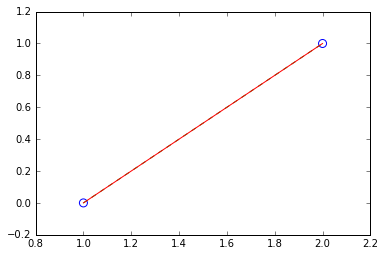

In [3]:
plot(result)

The plot shows the two input points as blue circles, the fit line in red
and a least squares fit line (which agrees in this case) in dashed green.

## A less trivial example

Regression is more interesting when you are fitting more samples than dimensions
that are not linearly related.
Below we fit one dependent variable with the mapping
```
1 --> 0
2 --
```

(array([ 0.5]), -0.500, array([ 0. , -0.5,  0. ]), 3, 1)

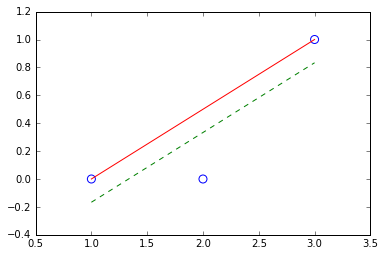

In [4]:
# Less trivial example usage
# Independent variable values
U = ([1], [2], [3])
# Dependent variable values
v = (0, 0, 1)
result = l1_fit(U, v)
plot(result)
result["m"], result["k"], result["residuals"], result["samples"], result["dimensions"]

In this case the least squared error fit and the least absolute error fit
do not agree.

## Many independent variable

The method will work with any number of independent variables.

Below we have a two independent variables mapping
```
(1,0) --> -1
(2,1) --> 1
(3,0) --> 1
```
This trivially fits the plane equation $ x + y - 2 = z $.  A "plot" of
the regression would require a 3 dimensional presentation, which is not
implemented here.

In [5]:
# A trivial example with 2 predictor variables x + y - 2
U = ([1, 0], [2, 1], [3, 0])
v = (-1, 1, 1)
result = l1_fit(U, v)
result["m"], result["k"], result["residuals"], result["samples"], result["dimensions"]

(array([ 1.,  1.]),
 -2.000,
 array([  0.000e+00,  -2.220e-16,   6.661e-16]),
 3,
 2)

Note that the we recover the equation $ 1x + 1y - 2 = z $ and all the residuals
are very near 0.

Below is a less trivail example with 2 independent variables that do not fit a plane.

In [6]:
# A non trivial example with 2 predictor variables x + y - 2 and one outlier
U = ([1, 1], [1, -1], [-1, -1], [-1, 1], [0, 0])
v = (0, -2, -4, -2, -1.3)
result = l1_fit(U, v)
result["m"], result["k"], result["residuals"], result["samples"], result["dimensions"]

(array([ 1.,  1.]),
 -2.000,
 array([ -4.441e-16,  -1.332e-15,  -4.441e-16,   4.441e-16,   7.000e-01]),
 5,
 2)

Note that all the residuals are near zero except for the last which has
essentially been rejected as an outlier.

Least absolute error regression is thought to be "better for ignoring outliers"
than other methods such as least squared error regression.

The example below illustrates how least squares regression (green) is more strongly
effected by outliers than least absolute error regression (red).

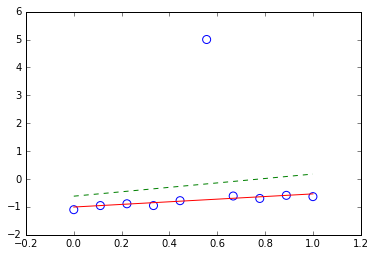

In [7]:
# nearly linear with an outlier
n = 10
x = np.linspace(0,1,n)
small_error = (np.random.randn(n)-0.5) * 0.1
y = (0.5 * x - 1) + small_error
y[5] = 5

U = x.reshape((n, 1))
v = y
result = l1_fit(U, v)
plot(result)

Note that most of the points are very near the least absolute error line
except for the single outlier which pulls the least squared error line away.

For more random data sets the two fit methods can disagree strongly.  Here is
a random example with on independent variable.

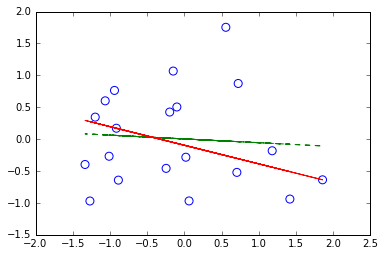

In [8]:
# a random 1d example
n = 20
x = np.random.randn(n)
y = np.random.randn(n)
U = x.reshape((n, 1))
v = y
result = l1_fit(U, v)
plot(result)